<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [14]:
!pip install osmnx geopy scikit-learn

In [52]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

<ipython-input-75-15101dc66cc5>:9: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = osmnx.graph_from_bbox(north, south, east, west, network_type='walk')


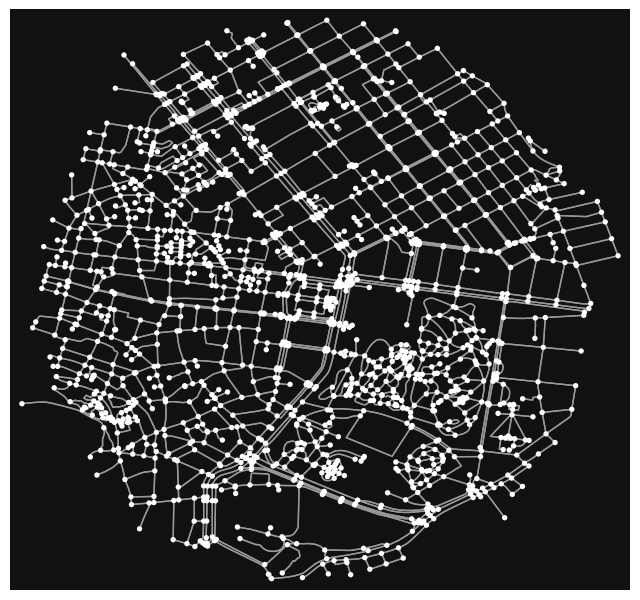

In [75]:

# Define your central point coordinates (latitude, longitude)
central_point = (37.9755648, 23.7348324)
cp_c=(23.7348324,37.9755648)
# Define the distance (in meters) from the central point to create the bounding box
distance = 1000  # 1km from the central point
# Calculate the bounding box
north, south, east, west = osmnx.utils_geo.bbox_from_point(central_point, dist=distance)
# Download the street network within the bounding box
G = osmnx.graph_from_bbox(north, south, east, west, network_type='walk')


circle = Point(cp_c).buffer(0.008)

circle, crs = osmnx.projection.project_geometry(circle,crs=None, to_crs=None,to_latlong=True)

g_truncated = osmnx.truncate.truncate_graph_polygon(G, circle, retain_all=False, truncate_by_edge=True)

# Plot the truncated street network
fig, ax = osmnx.plot_graph(g_truncated, show=False)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Save the plot
plt.savefig("/content/netmap.jpeg", dpi=300)


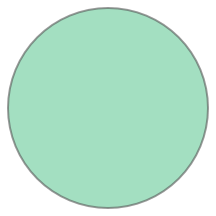

In [43]:
circle = Point(cp_c).buffer(100)
circle

In [49]:
circle_df = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

In [45]:
g_truncated = osmnx.truncate.truncate_graph_polygon(G, circle_df["geometry"][0], retain_all=False, truncate_by_edge=False)

In [47]:
p = Point(central_point)

<Axes: >

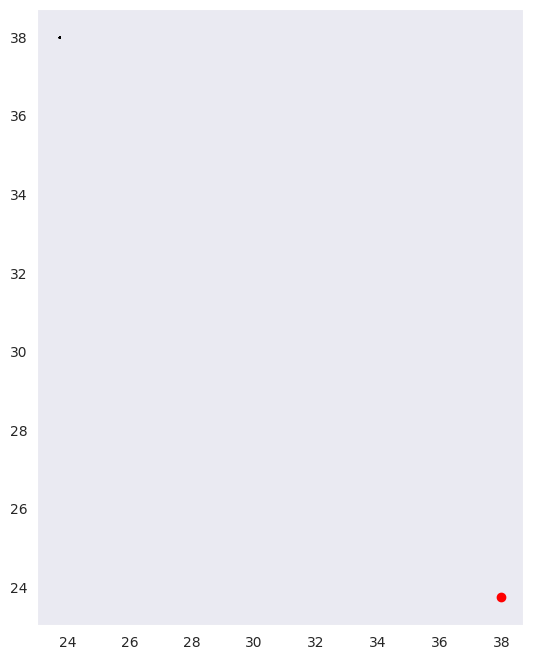

In [50]:
# showing our street network

figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
circle_df.plot(ax=ax, color="red")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(G)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# figure, ax = osmnx.plot_graph(G)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [7]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

NameError: name 'PLACE_NAME' is not defined

<Axes: >

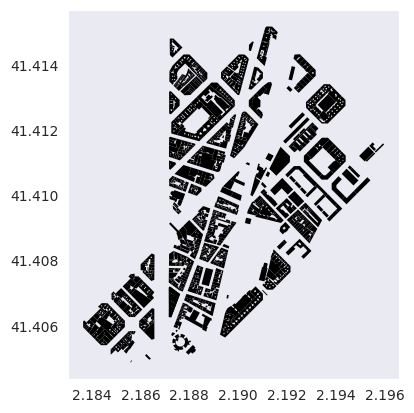

In [10]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [11]:
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
restaurants.head()

<ipython-input-11-995886824f10>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  restaurants = osmnx.geometries_from_place(


addr:housenumber                   addr:street  \
element_type osmid                                                       
node         3009041122              282                  Lope de Vega   
             3009083162              NaN  Carrer del Concili de Trento   
             3009091336               48  Carrer del Concili de Trento   
             3049368345               78               Carrer del Clot   
             3049371937               49               Carrer del Clot   

                            amenity  \
element_type osmid                    
node         3009041122  restaurant   
             3009083162  restaurant   
             3009091336  restaurant   
             3049368345  restaurant   
             3049371937  restaurant   

                                                         contact:facebook  \
element_type osmid                                                          
node         3009041122  https://www.facebook.com/Frankfurt.Elracodelamel   
             3009083162                                               NaN   
             3009091336                                               NaN   
             3049368345                                               NaN   
             3049371937                                               NaN   

                                                    name  \
element_type osmid                                         
node         3009041122      Frankfurt El Racó de la Mel   
             3009083162                  Golf Restaurant   
             3009091336  Bar Restaurant Virona4 Pizzeria   
             3049368345                   A ruta gallega   
             3049371937                      La Clotenca   

                                         geometry       cuisine  \
element_type osmid                                                
node         3009041122  POINT (2.19359 41.41222)           NaN   
             3009083162  POINT (2.19331 41.41164)           NaN   
             3009091336  POINT (2.19317 41.41155)  indian;pizza   
             3049368345  POINT (2.18852 41.40832)           NaN   
             3049371937  POINT (2.18806 41.40772)         pizza   

                                           website  addr:city internet_access  \
element_type osmid                                                              
node         3009041122                        NaN        NaN             NaN   
             3009083162                        NaN        NaN             NaN   
             3009091336  http://virona4pizzeria.es        NaN             NaN   
             3049368345                        NaN  Barcelona             NaN   
             3049371937                        NaN  Barcelona            wlan   

                         ... payment:coins payment:visa payment:visa_debit  \
element_type osmid       ...                                                 
node         3009041122  ...           NaN          NaN                NaN   
             3009083162  ...           NaN          NaN                NaN   
             3009091336  ...           NaN          NaN                NaN   
             3049368345  ...           NaN          NaN                NaN   
             3049371937  ...           NaN          NaN                NaN   

                        contact:phone description payment:discover_card  \
element_type osmid                                                        
node         3009041122           NaN         NaN                   NaN   
             3009083162           NaN         NaN                   NaN   
             3009091336           NaN         NaN                   NaN   
             3049368345           NaN         NaN                   NaN   
             3049371937           NaN         NaN                   NaN   

                        payment:mastercard nodes building:levels building:part  
element_type osmid                                                            

### 🎢 Putting it all together in one map

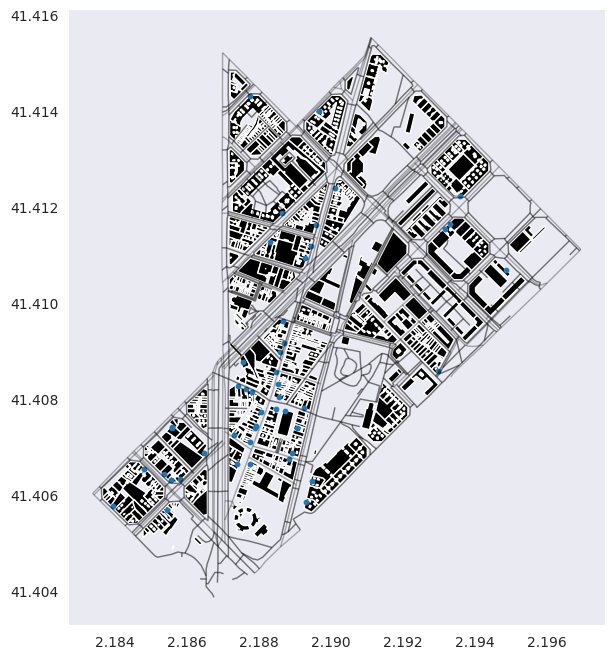

In [12]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

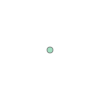

In [13]:
coords = (2.2011003,41.3989949)
p = Point(coords)
p

In [ ]:
print(p.x, p.y)

2.2011003 41.3989949


In [ ]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

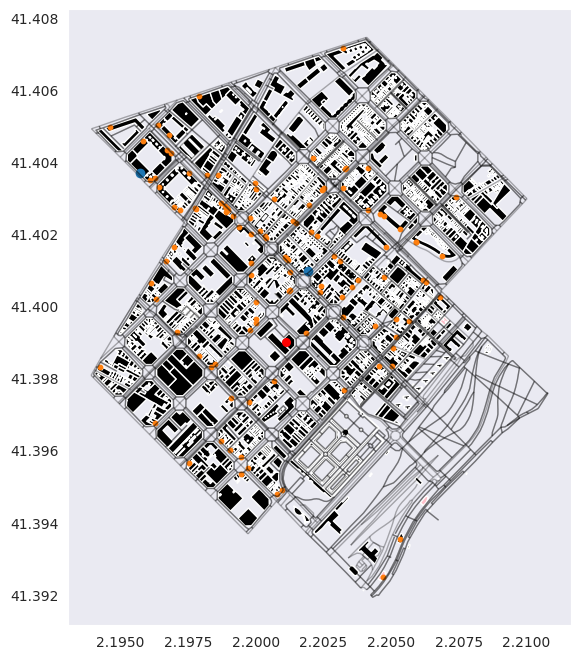

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geom.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [ ]:
our_place = "Casino l'Aliança del Poblenou"  # "Institute for Advanced Architecture of Catalonia"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

geometry                                            address
0  POINT (2.20336 41.39986)  Casino l'Aliança del Poblenou, Rambla del Pobl...

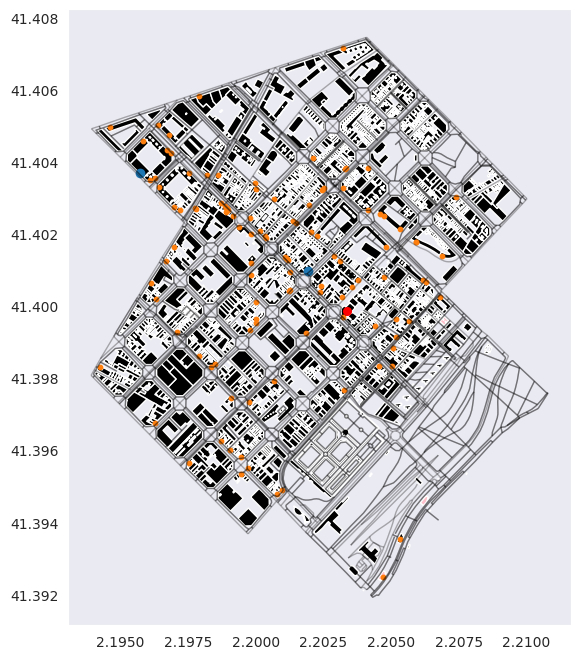

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [ ]:
rad = p.buffer(0.008 * 0.5)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

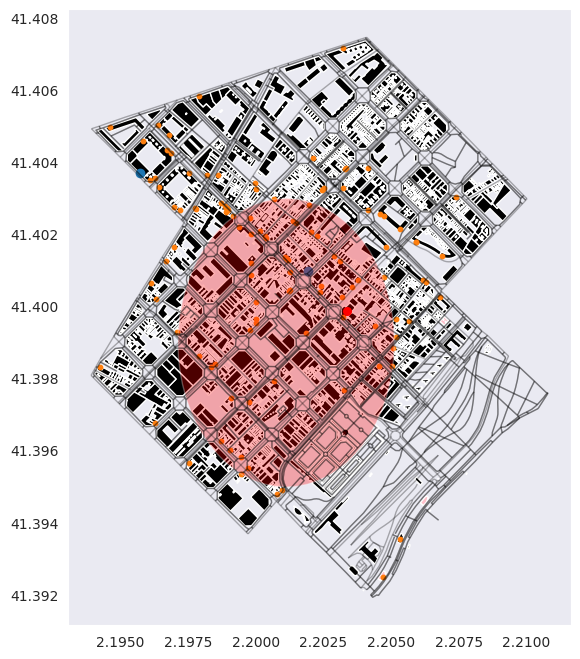

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

plt.show()

In [ ]:
accessible_restaurants = [r for r in restaurants["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_restaurants = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_restaurants,
    },
    crs=buildings.crs
)

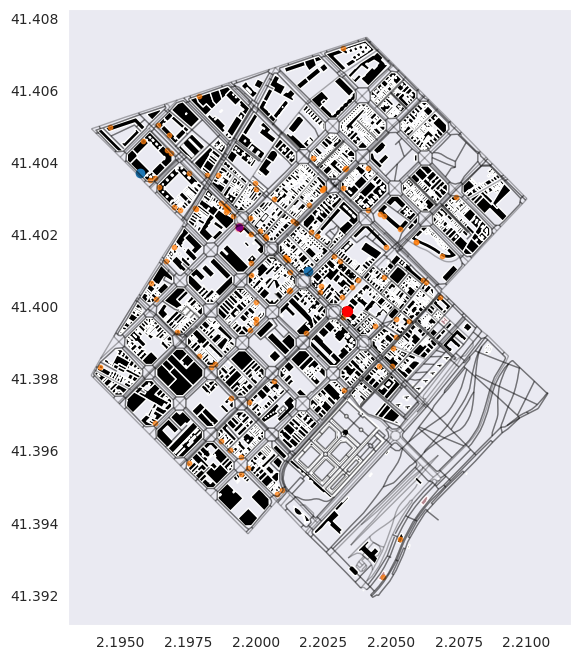

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10, alpha=0.7)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

accessible_restaurants.plot(ax=ax, facecolor="purple", markersize=20, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

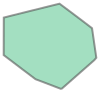

In [ ]:
zone = edges.unary_union.convex_hull
zone

In [ ]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 1907,
 'm': 5413,
 'k_avg': 5.67697954902989,
 'edge_length_total': 160919.76599999916,
 'edge_length_avg': 29.728388324404058,
 'streets_per_node_avg': 3.40534871525957,
 'streets_per_node_counts': {0: 0, 1: 44, 2: 2, 3: 1009, 4: 841, 5: 11},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.023072889355007866,
  2: 0.001048767697954903,
  3: 0.5291033036182485,
  4: 0.4410068169900367,
  5: 0.0057682223387519665},
 'intersection_count': 1863,
 'street_length_total': 95690.108,
 'street_segment_count': 3176,
 'street_length_avg': 30.129127204030226,
 'circuity_avg': 1.030140938475798,
 'self_loop_proportion': 0.001889168765743073,
 'node_density_km': 10249958297341.55,
 'intersection_density_km': 10013462143653.543,
 'edge_density_km': 864929675258496.1,
 'street_density_km': 514325965636134.75}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [ ]:
origin = (
    osmnx.geocode_to_gdf("Institute for Advanced Architecture of Catalonia")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Jardins de l'Arenal de Llevant")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

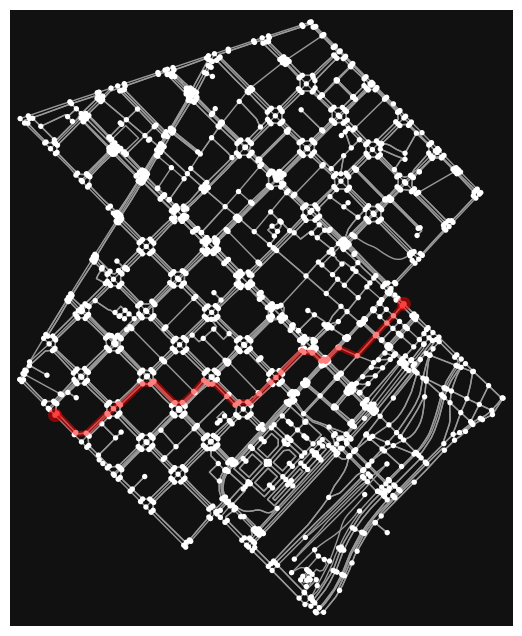

In [ ]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [ ]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

/tmp/ipykernel_2205/3375068879.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.01473
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

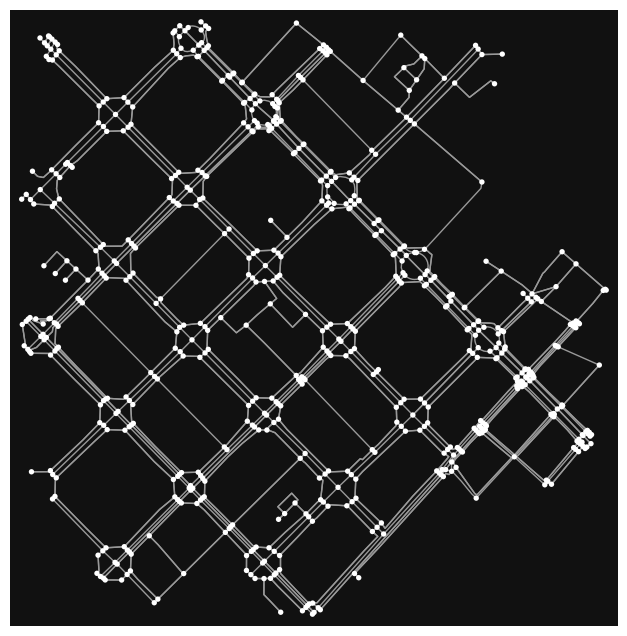

In [ ]:
# getting iaac node from the graph:
iaac_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, iaac_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


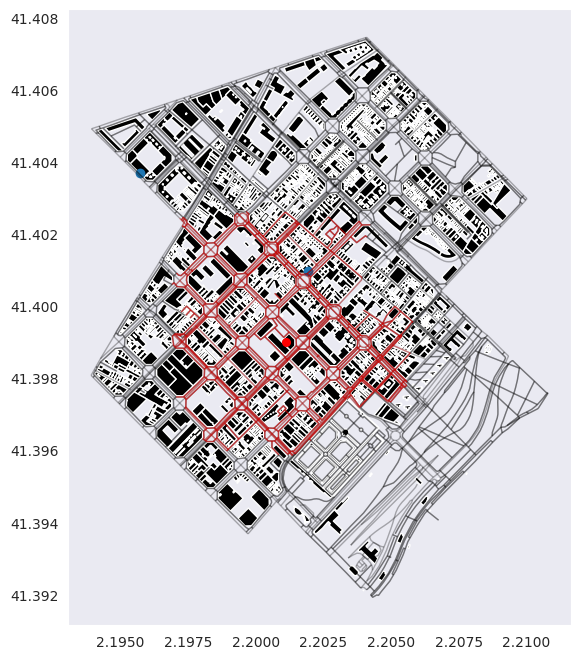

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

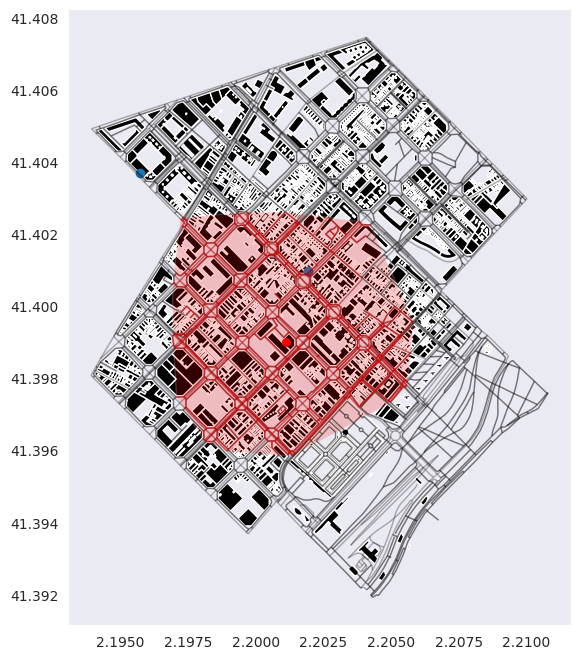

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.